# Going Deeper 12. ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î≥¥Îäî OCR

Ïö∞Î¶¨Í∞Ä ÎßåÎì§Í≥†Ïûê ÌïòÎäî OCRÏùÄ Ïù¥ÎØ∏ÏßÄ ÏÜçÏóêÏÑú ÏòÅÎ¨∏ÏùÑ Bounding boxÎ°ú Ï∞æÏïÑÎÇ¥Í≥† Í∑∏ Bounding box ÎÇ¥Ïóê Ïñ¥Îñ§ TextÍ∞Ä Ìè¨Ìï®ÎêòÎäîÏßÄ Ïïå Ïàò ÏûàÎäî ÏãúÏä§ÌÖúÏù¥Îã§. 

## Dataset for OCR

- OCRÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÌïÑÏöîÌïú ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥Î•º ÏÇ¨ÎûåÏù¥ ÏßÅÏ†ë ÏûÖÎ†•Ìï¥Ïïº ÌïòÎäî Î≤àÍ±∞Î°úÏõÄÏù¥ ÏûàÎã§.
- Îî∞ÎùºÏÑú OCR Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÎüâÏúºÎ°ú ÎßåÎì§Î†§Î©¥ ÌÅ∞ ÎπÑÏö©Ïù¥ Îì†Îã§.
- Îç∞Ïù¥ÌÑ∞ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï Ï§ë ÌïòÎÇòÎ°úÎäî Ïª¥Ìì®ÌÑ∞Î°ú ÎåÄÎüâ Î¨∏Ïûê Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Ïñ¥ÎÇ¥Îäî Î∞©Î≤ïÏù¥Îã§.

## 0. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

<Ï§ÄÎπÑÎ¨º>  
- mkdir -p ~/aiffel/ocr  
- ln -s ~/data ~/aiffel/ocr/data

In [1]:
import os

path = os.path.join(os.getenv('HOME'),'aiffel/ocr')
os.chdir(path)

print(path)

/aiffel/aiffel/ocr


## 1. Recognition model (1)

Text recognition Î™®Îç∏ÏùÑ ÏßÅÏ†ë ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. Recognition Î™®Îç∏ÏùÄ 2015ÎÖÑÏóê Î∞úÌëúÎêú ÏïÑÎûò ÎÖºÎ¨∏ÏóêÏÑú Ï≤òÏùå ÏÜåÍ∞úÎêú CRNN Íµ¨Ï°∞Î•º ÌôúÏö©Ìï¥ÏÑú ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù Ìï©ÏãúÎã§.

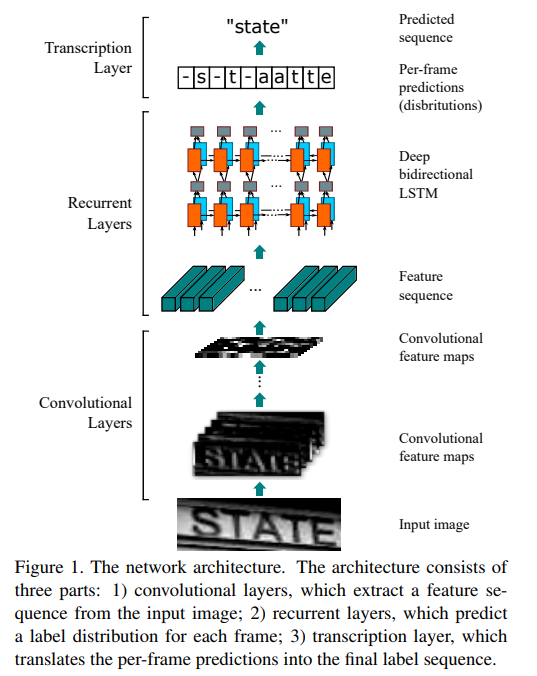

- CRNNÏùò Íµ¨Ï°∞Î•º ÏÇ¥Ìé¥Î≥¥Í∏∞ ÏúÑÌï¥ ÏïÑÎûò Input imageÎ∂ÄÌÑ∞ Î≥¥Î©¥ Îê©ÎãàÎã§. ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ•º Conv layerÎ•º ÌÜµÌï¥ FeatureÎ•º Ï∂îÏ∂úÌïòÏó¨ featureÎ•º ÏñªÏñ¥ÎÉÖÎãàÎã§.
- Recurrent LayersÎäî Ï∂îÏ∂úÎêú featureÏùò Ï†ÑÏ≤¥ contextÎ•º ÌååÏïÖÌïòÍ≥† Îã§ÏñëÌïú output ÌÅ¨Í∏∞Ïóê ÎåÄÏùëÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.
- ÎßàÏßÄÎßâÏúºÎ°ú Transcription layer(Fully connected layer)Îäî stepÎßàÎã§ Ïñ¥Îñ§ characterÏùò ÌôïÎ•†Ïù¥ ÎÜíÏùÄÏßÄ ÏòàÏ∏°Ìï©ÎãàÎã§.

Î™á Í∞úÏùò ClassÍ∞Ä ÌïÑÏöîÌïúÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïú ÌõÑ ÌÄ¥Ï¶àÎ•º ÌíÄÏñ¥Î≥¥Ïûê!

In [2]:
NUMBERS = "0123456789"
ENG_CHAR_UPPER = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
TARGET_CHARACTERS = ENG_CHAR_UPPER + NUMBERS
print(f"The total number of characters is {len(TARGET_CHARACTERS)}")

The total number of characters is 36


lmdbÎ•º Ïù¥Ïö©Ìï† ÏòàÏ†ï  
LMDBÎäî SymasÏóêÏÑú ÎßåÎì† Lightning Memory-Mapped DatabaseÏùò ÏïΩÏûêÏù¥Îã§. Ïò§Îäò Ïö∞Î¶¨Í∞Ä Îã§Î£®Í≤å Îê† Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ lmdb Ìè¨Îß∑(mdb)Ïùò ÌååÏùºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎã§!!  

<Îã§Ïö¥ÏΩîÎìú>
- $ pip install lmdb

In [3]:
## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

import re
import six
import math
import lmdb
import copy
import os
import numpy as np
import tensorflow as tf

from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

## Îã§Ïö¥Î°úÎìú Ìïú MJ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏúÑÏπòÎèÑ ÌôïÏù∏Ìï¥Î≥¥Ïûê!

BATCH_SIZE = 128
HOME_DIR = os.getenv('HOME')+'/aiffel/ocr'

TRAIN_DATA_PATH = HOME_DIR+'/data/MJ/MJ_train'
VALID_DATA_PATH = HOME_DIR+'/data/MJ/MJ_valid'
TEST_DATA_PATH = HOME_DIR+'/data/MJ/MJ_test'

print(TRAIN_DATA_PATH)

/aiffel/aiffel/ocr/data/MJ/MJ_train


## 2. Recognition model (2) Input Image

original image width:72, height:31
target_img_size:(74, 32)
display img shape:(74, 32, 3)
label:Lube


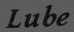

original image width:82, height:31
target_img_size:(84, 32)
display img shape:(84, 32, 3)
label:Spencerian


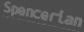

original image width:115, height:31
target_img_size:(100, 32)
display img shape:(100, 32, 3)
label:accommodatingly


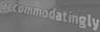

original image width:140, height:31
target_img_size:(100, 32)
display img shape:(100, 32, 3)
label:CARPENTER


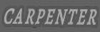

In [4]:
from IPython.display import display

## envÏóê Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≤†Îã§!!
## lmdbÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Îïå envÎùºÎäî Î≥ÄÏàòÎ™ÖÏùÑ ÏÇ¨Ïö©ÌïòÎäîÍ≤å ÏùºÎ∞òÏ†ÅÏûÑ

env = lmdb.open(TRAIN_DATA_PATH, 
                max_readers=32, 
                readonly=True, 
                lock=False, 
                readahead=False, 
                meminit=False)

## Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Î•º txn(transaction)Ïù¥ÎùºÎäî Î≥ÄÏàòÎ•º ÌÜµÌï¥ Ïó∞Îã§.
## Ïù¥Ï†ú txnÎ≥ÄÏàòÎ•º ÌÜµÌï¥ ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞Ïóê Ï†ëÍ∑º Ìï† Ïàò ÏûàÏùå

with env.begin(write=False) as txn:
    for index in range(1, 5):
        
        ## indexÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÎùºÎ≤® ÌÇ§ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌÇ§Î•º ÎßåÎì§Î©¥
        ## txnÏóêÏÑú ÎùºÎ≤®Í≥º Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥Ïò¨ Ïàò ÏûàÎã§.
        
        label_key = 'label-%09d'.encode() % index
        label = txn.get(label_key).decode('utf-8')
        img_key = 'image-%09d'.encode() % index
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)

        ## Ïù¥ÎØ∏ÏßÄÎäî Î≤ÑÌçºÎ•º ÌÜµÌï¥ ÏùΩÏñ¥Ïò§Í∏∞ ÎïåÎ¨∏Ïóê 
        ## Î≤ÑÌçºÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏù¥ Îã§Ïãú ÌïÑÏöîÌïòÎã§.
        try:
            img = Image.open(buf).convert('RGB')

        except IOError:
            img = Image.new('RGB', (100, 32))
            label = '-'

        ## ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï∂úÎ†•Ìï¥ Î≥¥Ïûê!
        width, height = img.size
        print('original image width:{}, height:{}'.format(width, height))
        
        ## Ïù¥ÎØ∏ÏßÄ ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú ÎÜíÏù¥Î•º 32Î°ú Î∞îÍøÄÍ±∞ÏûÑ
        ## ÌïòÏßÄÎßå ÎÑàÎπÑÎ•º 100Î≥¥Îã§Îäî ÏûëÍ≤åÌïòÍ≥† Ïã∂Îã§!!!
        
        target_width = min(int(width*32/height), 100)
        target_img_size = (target_width,32)        
        print('target_img_size:{}'.format(target_img_size))        
        img = np.array(img.resize(target_img_size)).transpose(1,0,2)

        ## Ïù¥Ï†ú ÎÜíÏù¥Í∞Ä 32Î°ú ÏùºÏ†ïÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ Ìï®Íªò Ï∂úÎ†•Ìï† Ïàò ÏûàÎã§!
        
        print('display img shape:{}'.format(img.shape))
        print('label:{}'.format(label))
        display(Image.fromarray(img.transpose(1,0,2).astype(np.uint8)))

ÏúÑÏóê Í≤∞Í≥ºÍ∞íÏùÑ Î≥¥Î©¥!! Ïù¥ÎØ∏ÏßÄÏùò height Îäî ÎåÄÎ∂ÄÎ∂ÑÏù¥ 31, ÏµúÎåÄ 32Ïù¥Í≥†!   
width Îäî Î¨∏ÏûêÏó¥ Í∏∏Ïù¥Ïóê Îî∞ÎùºÏÑú Îã§ÏñëÌïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

Ïù¥Ï†úÎäî lmdbÎ•º ÌôúÏö©ÌïòÏó¨ ÏºÄÎùºÏä§ Î™®Îç∏ ÌïôÏäµÏö© MJSynthÎç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§Î•º Íµ¨ÌòÑ

In [5]:
class MJDatasetSequence(Sequence):
    
    ## Í∞ùÏ≤¥Î•º Ï¥àÍ∏∞Ìôî Ìï† Îïå lmdbÎ•º Ïó¥Ïñ¥ envÏóê Ï§ÄÎπÑ
    ## lmdbÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º ÎØ∏Î¶¨ ÌååÏïÖ
    
    def __init__(self, 
                 dataset_path,        ## dataset_path Îäî ÏùΩÏñ¥Îì§Ïùº Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÎ°úÏù¥Îã§.
                 label_converter,    ## label_converter Îäî ÏïÑÎûòÏóêÏÑú Îü¨Î∂ÑÏù¥ Î¨∏ÏûêÎ•º ÎØ∏Î¶¨Ï†ïÏùòÎêú indexÎ°ú Î≥ÄÌôòÌï¥Ï£ºÎäî converterÎ°ú ÏßÅÏ†ë Íµ¨ÌòÑÌïòÎèÑÎ°ù ÌïúÎã§.
                 batch_size=1,
                 img_size=(100,32),  ## ÏûÖÎ†•Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞
                 max_text_len=22,    ## ÌïÑÌÑ∞ÎßÅÏùÑ ÏúÑÌïú ÏµúÎåÄ Í∏ÄÏûê Ïàò
                 is_train=False,     
                 character='') :     ## ÌïôÏäµÎåÄÏÉÅÏúºÎ°ú ÌïúÏ†ïÌïòÍ∏∞ ÏúÑÌïú characterÎì±ÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÎèÑÎ°ù Íµ¨ÌòÑÎêòÏñ¥ ÏûàÎã§!
        
        self.label_converter = label_converter
        self.batch_size = batch_size
        self.img_size = img_size
        self.max_text_len = max_text_len
        self.character = character
        self.is_train = is_train
        self.divide_length = 100

        self.env = lmdb.open(dataset_path, max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)
        with self.env.begin(write=False) as txn:
            self.num_samples = int(txn.get('num-samples'.encode()))
            self.index_list = [index + 1 for index in range(self.num_samples)]
        

    def __len__(self):
        return math.ceil(self.num_samples/self.batch_size/self.divide_length)
    
    ## indexÏóê Ìï¥ÎãπÌïòÎäî imageÏôÄ labelÏùÑ ÏùΩÏñ¥Ïò®Îã§.
    ## ÏúÑÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏΩîÎìúÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨
    ## labelÏùÑ Ï°∞Í∏à Îçî Îã§Îì¨Îäî Í≤ÉÏù¥ Îã§Î¶Ñ
    
    def _get_img_label(self, index):
        with self.env.begin(write=False) as txn:
            label_key = 'label-%09d'.encode() % index
            label = txn.get(label_key).decode('utf-8')
            img_key = 'image-%09d'.encode() % index
            imgbuf = txn.get(img_key)

            buf = six.BytesIO()
            buf.write(imgbuf)
            buf.seek(0)
            try:
                img = Image.open(buf).convert('RGB')

            except IOError:
                img = Image.new('RGB', self.img_size)
                label = '-'
            width, height = img.size
            
            target_width = min(int(width*self.img_size[1]/height), self.img_size[0])
            target_img_size = (target_width, self.img_size[1])
            img = np.array(img.resize(target_img_size)).transpose(1,0,2)
            ## labelÏùÑ ÏïΩÍ∞Ñ Îçî Îã§Îì¨ÎäîÎã§.
            label = label.upper()
            out_of_char = f'[^{self.character}]'
            label = re.sub(out_of_char, '', label)
            label = label[:self.max_text_len]

        return (img, label)
    
    ## __getitem__ ÏùÄ ÏïΩÏÜçÎêòÏñ¥ ÏûàÎäî Î©îÏÑúÎìúÏûÑ
    ## Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏûëÏÑ±ÌïòÎ©¥ slice Ìï† Ïàò ÏûàÏùå
    ## ÏûêÏÑ∏Ìïú ÎÇ¥Ïö© ÏïÑÎûò Î¨∏ÏÑú Ï∞∏Í≥†
    ## https://docs.python.org/3/reference/datamodel.html#object.__getitem__
    ##
    ## 1. idxÏóê Ìï¥ÎãπÌïòÎäî index_listÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¥
    ## 2. imageÏôÄ labelÏùÑ Î∂àÎü¨Ïò¥
    ## 3. ÏÇ¨Ïö©ÌïòÍ∏∞ Ï¢ãÏùÄ inputsÍ≥º outputs ÌòïÌÉúÎ°ú Î∞òÌôòÌï®
    def __getitem__(self, idx):
       
        ## 1.
        batch_indicies = self.index_list[
            idx*self.batch_size:
            (idx+1)*self.batch_size
        ]
        input_images = np.zeros([self.batch_size, *self.img_size, 3])
        labels = np.zeros([self.batch_size, self.max_text_len], dtype='int64')

        input_length = np.ones([self.batch_size], dtype='int64') * self.max_text_len
        label_length = np.ones([self.batch_size], dtype='int64')

        ## 2.
        for i, index in enumerate(batch_indicies):
            img, label = self._get_img_label(index)
            encoded_label = self.label_converter.encode(label)
            ## Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú '-'Ïù¥ Ï∂îÍ∞ÄÎêòÎ©¥ max_text_lenÎ≥¥Îã§ Í∏∏Ïñ¥Ïßà Ïàò ÏûàÎã§.
            if len(encoded_label) > self.max_text_len:
                continue
            width = img.shape[0]
            input_images[i,:width,:,:] = img
            labels[i,0:len(encoded_label)] = encoded_label
            label_length[i] = len(encoded_label)
        
        ## 3.
        inputs = {
            'input_image': input_images,
            'label': labels,
            'input_length': input_length,
            'label_length': label_length,
        }
        outputs = {'ctc': np.zeros([self.batch_size, 1])}

        return inputs, outputs

ÏúÑ Î∂ÑÏÑùÏΩîÎìúÏ≤òÎüº Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º img, labelÏùò ÏåçÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Î∂ÄÎ∂ÑÏùÄ _get_img_label() Î©îÏÜåÎìúÏóê Î∞òÏòÅÎê®. model.fit()ÏóêÏÑú Ìò∏Ï∂úÎêòÎäî __getitem__() Î©îÏÜåÎìúÏóêÏÑú Î∞∞Ïπò Îã®ÏúÑÎßåÌÅº _get_img_label()ÏùÑ ÌÜµÌï¥ Í∞ÄÏ†∏Ïò® datasetÏùÑ returnÌï®. _get_img_label()ÏùÑ Î≥¥Î©¥ Îã§ÏñëÌïú ÏÇ¨Ïù¥Ï¶àÏùò Ïù¥ÎØ∏ÏßÄÎ•º Î™®Îëê heightÎäî 32Î°ú ÎßûÏ∂îÍ≥†, widthÎäî ÏµúÎåÄ 100ÍπåÏßÄ ÎßûÏ∂§

## 3. Recognition model (3) Encode

OCR Î™®Îç∏ ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïóê Ïôú Í≥µÎ∞± Î¨∏ÏûêÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥Ïïº ÌïòÎäîÏßÄÎäî Îã§Ïùå Ïä§ÌÖùÏóêÏÑú ÏÑ§Î™ÖÌï† ÏòàÏ†ïÏù¥Îã§. 

In [6]:
class LabelConverter(object):
    
    def __init__(self, character):
        self.character="-" + character
        self.label_map = dict()
        
        for i, char in enumerate(self.character):
            self.label_map[char]=i
            
    def encode(self, text):
        encoded_label = []
        for i, char in enumerate(text):
            if i > 0 and char == text[i-1]:
                encoded_label.append(0) 
                ## Í∞ôÏùÄ Î¨∏Ïûê ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏Ïûê labelÏùÑ ÏÇΩÏûÖ
            encoded_label.append(self.label_map[char])    
        return np.array(encoded_label)
    
    def decode(self, encoded_label):
        target_characters = list(self.character)
        decoded_label = ""
        for encode in encoded_label:
            decoded_label += self.character[encode]
        return decoded_label
    
print("Ïäùüí®")

Ïäùüí®


In [7]:
## 'HELLO'Î•º EncodeÌïú ÌõÑ DecodeÍ∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÎêòÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
label_converter = LabelConverter(TARGET_CHARACTERS)

encoded_text = label_converter.encode('HELLO')
print('Encoded_text:', encoded_text)
decoded_text = label_converter.decode(encoded_text)
print('Decoded_text:', decoded_text)

Encoded_text: [ 8  5 12  0 12 15]
Decoded_text: HEL-LO


ÏúÑÏóê Í≤∞Í≥ºÍ∞íÏùÑ Î≥¥Î©¥ ÎèôÏùºÌïú Í∏ÄÏûê 'L'Ïù¥ Ïó∞ÏÜçÎê† Îïå, Í∑∏ ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏ÏûêÍ∞Ä Ìè¨Ìï®Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

## 4. Recognition model (4) Build CRNN model

- Ïù¥Ï†ú ÏûÖÎ†•Í≥º Ï∂úÎ†•ÏùÑ Ï§ÄÎπÑÌñàÏúºÎãà Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î≥º Ï∞®Î°Ä
- KerasÏóêÏÑú Ï†úÍ≥µÌïòÎäî K.ctc_batch_cost()Î•º ÌôúÏö©Ìï¥ÏÑú lossÎ•º Í≥ÑÏÇ∞ÌïòÎèÑÎ°ù ctc_lambda_funcÎ•º ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÎßåÎì§Ïñ¥ÎëêÏóàÎã§/

In [8]:
## CTC lossÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Lambda Ìï®Ïàò

def ctc_lambda_func(args): 
    labels, y_pred, label_length, input_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

print("Ïäùüí®")

Ïäùüí®


Ïù¥Ï†ú, K.ctc_batch_cost()Î•º ÌôúÏö©ÌïòÏó¨, image_inputÏùÑ ÏûÖÎ†•ÏúºÎ°ú, ÎßàÏßÄÎßâ LabelÏùÑ 'output'Ïù¥ÎùºÎäî Ïù¥Î¶ÑÏúºÎ°ú Ï∂úÎ†•ÌïòÎäî Î†àÏù¥Ïñ¥Î•º Í∞ñÎèÑÎ°ù Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Ìï®Ïàò build_crnn_model()ÏùÑ Íµ¨ÌòÑÌï¥ Î≥¥Ïûê!!!

In [9]:
## K.ctc_batch_cost()Î•º ÌôúÏö©ÌïòÏó¨
## image_inputÏùÑ ÏûÖÎ†•, ÎßàÏßÄÎßâ LabelÏùÑ 'output'ÏúºÎ°ú Ï∂úÎ†•ÌïòÎäî layerÎ•º Í∞ñÎèÑÎ°ù
## Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Ìï®Ïàò build_crnn_model()ÏùÑ Íµ¨ÌòÑ


def build_crnn_model(input_shape=(100,32,3), characters=TARGET_CHARACTERS):
    num_chars = len(characters)+2
    image_input = layers.Input(shape=input_shape, dtype='float32', name='input_image')
    
    ## Build CRNN model
    conv = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(image_input)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)     
    feature = layers.Conv2D(512, (2, 2), activation='relu', kernel_initializer='he_normal')(conv)
    sequnce = layers.Reshape(target_shape=(24, 512))(feature)
    sequnce = layers.Dense(64, activation='relu')(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    y_pred = layers.Dense(num_chars, activation='softmax', name='output')(sequnce)

    labels = layers.Input(shape=[22], dtype='int64', name='label')
    input_length = layers.Input(shape=[1], dtype='int64', name='input_length')
    label_length = layers.Input(shape=[1], dtype='int64', name='label_length')
    loss_out = layers.Lambda(ctc_lambda_func, output_shape=(1,), name="ctc")(
        [labels, y_pred, label_length, input_length]
    )
    model_input = [image_input, labels, input_length, label_length]
    model = Model(
        inputs=model_input,
        outputs=loss_out
    )
    return model

print("Ïäùüí®")

Ïäùüí®


## 5. Recognition model (5) Train & Inference

Ïù¥Ï†ú ÏïûÏóêÏÑú Ï†ïÏùòÌïú MJDatasetSequenceÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏ†àÌûà Î∂ÑÎ¶¨ÌïòÏó¨ Íµ¨ÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌÜµÌï¥ ÌïôÏäµÏùÑ ÏãúÏºúÎ≥¥Ïûê!

In [11]:
## Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ÏùÑ Ï§ÄÎπÑ
train_set = MJDatasetSequence(TRAIN_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS, is_train=True)
val_set = MJDatasetSequence(VALID_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS)
model = build_crnn_model()

## Î™®Îç∏ÏùÑ Ïª¥ÌååÏùº
optimizer = tf.keras.optimizers.Adadelta(lr=0.1, clipnorm=5)
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
## ÌõàÎ†®Ïù¥ Îπ®Î¶¨ ÎÅùÎÇ† Ïàò ÏûàÎèÑÎ°ù 
##ModelCheckPointÏôÄ EarlyStoppingÏùÑ ÏÇ¨Ïö©

checkpoint_path = HOME_DIR + '/model_checkpoint.hdf5'

ckp = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor='val_loss',
    verbose=1, save_best_only=True, save_weights_only=True
)
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='min'
)
model.fit(train_set,
          steps_per_epoch=len(train_set),
          epochs=100,
          validation_data=val_set,
          validation_steps=len(val_set),
          callbacks=[ckp, earlystop])

Epoch 1/100
565/565 [==============================] - 100s 155ms/step - loss: 25.0575 - val_loss: 23.9427

Epoch 00001: val_loss improved from inf to 23.94272, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 2/100
565/565 [==============================] - 88s 155ms/step - loss: 13.1217 - val_loss: 8.8122

Epoch 00002: val_loss improved from 23.94272 to 8.81218, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 3/100
565/565 [==============================] - 86s 153ms/step - loss: 6.6399 - val_loss: 6.2196

Epoch 00003: val_loss improved from 8.81218 to 6.21957, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 4/100
565/565 [==============================] - 85s 151ms/step - loss: 4.8512 - val_loss: 5.1076

Epoch 00004: val_loss improved from 6.21957 to 5.10756, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 5/100
565/565 [==============================] - 85s 151ms/step - loss: 3.8698 - val_loss: 4.5869

Epoch 00005: val_loss

Ïù¥Ï†ú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏ÏÖãÏùÑ ÌÜµÌï¥ ÌôïÏù∏Ìï¥ Î≥º Ï∞®Î°Ä

In [13]:
## Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò®Îã§.
test_set = MJDatasetSequence(TEST_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS)
model = build_crnn_model()
model.load_weights(checkpoint_path)

## crnn Î™®Îç∏ÏùÄ ÏûÖÎ†•Ïù¥ Î≥µÏû°Ìïú Íµ¨Ï°∞Ïù¥ÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï† ÏàòÍ∞Ä ÏóÜÎã§.
## Í∑∏ÎûòÏÑú crnn Î™®Îç∏Ïùò ÏûÖÎ†•Ï§ë 'input_image' Î∂ÄÎ∂ÑÎßå ÏÇ¨Ïö©Ìïú Î™®Îç∏ÏùÑ ÏÉàÎ°ú ÎßåÎì§Í≤ÉÏù¥Îã§.
## inference Ï†ÑÏö© Î™®Îç∏
input_data = model.get_layer('input_image').output
y_pred = model.get_layer('output').output
model_pred = Model(inputs=input_data, outputs=y_pred)

ÌïôÏäµÎêú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎààÏúºÎ°ú ÌôïÏù∏Ìï¥Î≥¥Ïûê!!

Result: 	 SLINKING9999999999999999


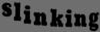

Result: 	 ALEPPO99999999999999999


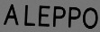

Result: 	 RWANDA999999999999999999


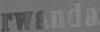

Result: 	 NATHANS99999999999999999


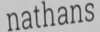

Result: 	 KALLBO99999999999999999


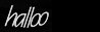

Result: 	 HURLS9999999999999999999


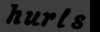

Result: 	 DOWNSIZE9999999999999999


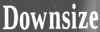

Result: 	 ROBOTIC99999999999999999


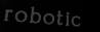

Result: 	 SLOPPY99999999999999999


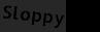

Result: 	 HERMITE99999999999999999


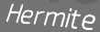

In [14]:
from IPython.display import display

## Î™®Îç∏Ïù¥ inferenceÌïú Í≤∞Í≥ºÎ•º Í∏ÄÏûêÎ°ú Î∞îÍøîÏ£ºÎäî Ïó≠Ìï†ÏùÑ Ìï®
## ÏΩîÎìú ÌïòÎÇòÌïòÎÇòÎ•º Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ï°∞Í∏à Ïñ¥Î†§Ïö∏ Ïàò ÏûàÎã§.
def decode_predict_ctc(out, chars = TARGET_CHARACTERS):
    results = []
    indexes = K.get_value(
        K.ctc_decode(
            out, input_length=np.ones(out.shape[0]) * out.shape[1],
            greedy=False , beam_width=5, top_paths=1
        )[0][0]
    )[0]
    text = ""
    for index in indexes:
        text += chars[index]
    results.append(text)
    return results

## Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï£ºÏñ¥ÏßÄÎ©¥ inferenceÎ•º ÏàòÌñâÌï®
## indexÍ∞ú ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ Î™®Îç∏Î°ú inferenceÎ•º ÏàòÌñâÌïòÍ≥†
## Í≤∞Í≥ºÎ•º ÎîîÏΩîÎî©Ìï¥ Ï∂úÎ†•Ìï¥Ï§ÄÎã§.

def check_inference(model, dataset, index = 5):
    for i in range(index):
        inputs, outputs = dataset[i]
        img = dataset[i][0]['input_image'][0:1,:,:,:]
        output = model.predict(img)
        result = decode_predict_ctc(output, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
        print("Result: \t", result)
        display(Image.fromarray(img[0].transpose(1,0,2).astype(np.uint8)))

check_inference(model_pred, test_set, index=10)

# ÌîÑÎ°úÏ†ùÌä∏: End-to-End OCR

- keras OCRÏùò Detector classÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Î¨∏Ïûê ÏúÑÏπòÎ•º Ï∞æÏïÑÎÇ¥Îäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†Îã§.
- Ïù¥Î•º ÏúÑÌï¥ÏÑú keras-ocrÏùÑ ÏÑ§ÏπòÌï¥Ï£ºÍ≥† DetectorÎ•º ÎßåÎì§Ïñ¥Î≥¥Ïûê!

### Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú(‚òÅÔ∏èÌÅ¥ÎùºÏö∞Îìú Ïú†Ï†ÄÏö©)

In [15]:
import cv2
import matplotlib.pyplot as plt
from keras_ocr.detection import Detector

SAMPLE_IMG_PATH = os.path.join(HOME_DIR+'/data/', 'sample.jpg')

detector = Detector()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5


- ÎØ∏ÏÖò : Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º Î∞õÏïÑ Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Î¨∏ÏûêÎ•º Ï∞æÏïÑÎÇ¥Îäî Ìï®ÏàòÎ•º keras-ocrÏùò DetectorÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî! inferenceÌïú ÌõÑÏóêÎäî Ïù¥Î•º ÏãúÍ∞ÅÌôîÌïòÎèÑÎ°ù Ìï©ÎãàÎã§. Îã®Ïñ¥Ïùò ÏòÅÏó≠ÏùÑ ÏûòÎùºÏò§ÎèÑÎ°ù Ìï¥Ï£ºÏÑ∏Ïöî.

#### Ïù¥Í≤å ÏóêÎü¨ÏΩîÎìú.... Ïù¥ Ìï®ÏàòÍ∞Ä Î≠êÍ∞Ä ÏûòÎ™ªÎêòÏñ¥ÏÑú Î∞ëÏóêÏÑú Ìò∏Ï∂úÏùÑ ÌïòÎãàÍπå Í≥ÑÏÜç ÏóêÎü¨Í∞Ä Îñ¥Îã§.. Í±∞Ïùò Ìïú 50Î≤àÏ†ïÎèÑ Ïã§ÌñâÏùÑ Ìïú ÎìØ„Öã„Öã„Öã„Öã„Öã

In [81]:
def detect_text(img_path):
    ## Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÏúÑÌï¥ÏÑú dimensionÏùÑ ÌôïÏû•Ìï¥Ï£ºÍ≥† kera-ocrÏùò ÏûÖÎ†• Ï∞®ÏõêÏóê ÎßûÍ≤å H,W,CÎ°ú Î≥ÄÍ≤Ω
    ## Î∞∞ÏπòÏùò Ï≤´ Î≤àÏß∏ Í≤∞Í≥ºÎßå Í∞ÄÏ†∏Ïò®Îã§.
    ## ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ÏÑú xÏôÄ yÏ¢åÌëúÎ•º Î≥ÄÍ≤ΩÌï¥Ï§ÄÎã§. (ÏïûÏÑ† h dimensionÏúºÎ°ú Ïù∏Ìï¥ y,xÎ°ú ÌëúÍ∏∞Îê®)
    img = cv2.imread(img_path)
    line_img = img.copy()
    input_img = img[tf.newaxis,...]
    result = detector.detect(input_img)
    ocr_result = result[0]
    
    cropped_imgs = []
    
    for text_result in ocr_result:
        text_result = text_result.astype(np.int16)
        for i in range(4):
            if i==3:
                line_img = cv2.line(line_img,tuple(text_result[3]),tuple(text_result[0]),(0,0,255),10)
            else:
                line_img = cv2.line(line_img,tuple(text_result[i]),tuple(text_result[i+1]),(0,0,255),10)
        
        x_min = text_result[:,0].min() - 5
        x_max = text_result[:,0].max() + 5
        y_min = text_result[:,1].min() - 5
        y_max = text_result[:,1].max() + 5
        cropped_imgs.append(img[int(y_min):int(y_max),int(x_min):int(x_max)])
    
    return line_img, cropped_imgs

- ÎØ∏ÏÖò : Ïù¥Ï†ú ÏúÑÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º ÏñªÏóàÏäµÎãàÎã§. Í∑∏Îüº Recognition modelÎ°ú Ïù∏ÏãùÌïòÎäî Ìï®ÏàòÎ•º ÏßÅÏ†ë ÏûëÏÑ±ÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï¥Î≥¥ÏÑ∏Ïöî!

In [82]:
def recognize_img(input_img, input_img_size=(100,32)):
    ## ÏûòÎ†§ÏßÑ Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÏãùÌïòÎäî ÏΩîÎìú
    img = input_img[:,:,::-1]
    img = cv2.resize(img, input_img_size)
    result_img = img.copy()
    img = img.transpose(1,0,2)
    img = img[tf.newaxis,...]
    output = model_pred.predict(img)
    result = decode_predict_ctc(output, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
    print("Result: \t", result)
    display(Image.fromarray(result_img.astype(np.uint8)))

In [83]:
## ÏúÑÏóêÏÑú Ï†ÅÏùÄÍ±∞ Ï≤òÎüº detect_text Ïù¥ Ìï®ÏàòÍ∞Ä Ïù¥ÏÉÅÌïòÎãàÍπå Ìò∏Ï∂úÌïòÎãàÍπå 
## Í≥ÑÏÜçÌï¥ÏÑú ÏóêÎü¨Í∞Ä Îñ¥Îã§„Öú„Öú

img_pil, cropped_img = detect_text(SAMPLE_IMG_PATH)
display(img_pil)

array([[[209, 214, 213],
        [206, 211, 210],
        [202, 207, 206],
        ...,
        [178, 182, 187],
        [178, 182, 187],
        [181, 185, 190]],

       [[184, 189, 188],
        [183, 188, 187],
        [181, 186, 185],
        ...,
        [178, 182, 187],
        [177, 181, 186],
        [178, 182, 187]],

       [[171, 176, 175],
        [171, 176, 175],
        [172, 177, 176],
        ...,
        [179, 183, 188],
        [180, 184, 189],
        [183, 187, 192]],

       ...,

       [[103,  77,  60],
        [105,  79,  62],
        [106,  80,  63],
        ...,
        [101,  73,  56],
        [102,  74,  57],
        [102,  74,  57]],

       [[104,  78,  61],
        [105,  79,  62],
        [107,  81,  64],
        ...,
        [102,  74,  57],
        [103,  75,  58],
        [103,  75,  58]],

       [[103,  77,  60],
        [105,  79,  62],
        [107,  81,  64],
        ...,
        [102,  74,  57],
        [103,  75,  58],
        [104,  76,  59]]

In [84]:
plt.imshow(img[:,:,::-1])

In [85]:
def recognize_img(input_img, input_img_size=(100,32)):
    ## ÏûòÎ†§ÏßÑ Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÏãùÌïòÎäî ÏΩîÎìú
    img = input_img[:,:,::-1]
    img = cv2.resize(img, input_img_size)
    result_img = img.copy()
    img = img.transpose(1,0,2)
    img = img[tf.newaxis,...]
    output = model_pred.predict(img)
    result = decode_predict_ctc(output, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
    print("Result: \t", result)
    display(Image.fromarray(result_img.astype(np.uint8)))

Result: 	 RARIER999999999999999999


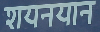

Result: 	 SLEEPER9999999999999999


In [86]:
for _img in cropped_img:
    recognize_img(_img)

In [87]:
SAMPLE_IMG_PATH = os.path.join(HOME_DIR+'/data/', 'sample.jpg')
img, cropped_img = detect_text(SAMPLE_IMG_PATH)
plt.imshow(img[:,:,::-1])

Result: 	 RARIER999999999999999999


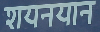

Result: 	 SLEEPER9999999999999999


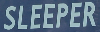

In [88]:
for _img in cropped_img:
    recognize_img(_img)

# <ÌöåÍ≥† ! >

## <Ïñ¥Î†§Ïõ†Îçò Ï†ê>  

- OpenCV 4.5 2 1: error: (-5:Bad argument) in function imshow Overload resolution failed

ÏûêÍæ∏ Ïù¥ ÏóêÎü¨Í∞Ä Îñ¥Îã§.. Ï≤®ÏóêÎäî Ïù¥ ÏóêÎü¨Í∞Ä Ïôú Îú®ÎäîÏßÄ Íµ¨Í∏ÄÎßÅÏùÑ Ìï¥ÎèÑ Ï†ïÌôïÌûà Í∞ôÏùÄ ÏóêÎü¨Í∞Ä ÏóÜÏñ¥ÏÑú Ïñ¥Î†§Ïõ†Îã§..Í∑ºÎç∞ Í≥ÑÏÜç Ï∞æÏïÑÎ≥¥Í≥† ÏßÑÏßú ÏãúÍ∞ÑÏùÑ ÎßéÏù¥ Ìà¨ÏûêÌñàÎçîÎãà type ÌòïÏù¥ Ïïà ÎßûÏïÑÏÑú Ïò§Î•òÍ∞Ä Îú¨ Í≤ÉÏù¥ÏóàÎã§.. Í∑∏ÎûòÏÑú intÌòïÏúºÎ°ú Î∞îÍøîÏ§òÏïºÌïòÎäî Í≤ÉÏùÄ ÏïåÍ≤†ÎäîÎç∞.. Ï†ïÌôïÌûà Ïñ¥Îäê Î∂ÄÎ∂ÑÏù∏ÏßÄ Ïïå ÏàòÍ∞Ä ÏóÜÏóàÎã§... Í∑∏ÎûòÏÑú Í≥†ÎØºÏùÑ ÎßéÏù¥ ÌïòÍ≥† Íµ¨Í∏ÄÎßÅÏùÑ ÎßéÏù¥ Ìï¥ÏÑú ÌòºÏûêÏÑú Ìï¥Í≤∞ÏùÑ ÌñàÎã§!!! 

text_result = text_result.astype(np.int16)  
ÏóêÎü¨ÏΩîÎìúÏóê Ï†ÄÍ±∏ Ï∂îÍ∞ÄÌï¥Ï§¨ÎäîÎç∞ ÏóêÎü¨Í∞Ä Îú®ÏßÄ ÏïäÍ≥† Ïûò ÎèåÏïÑÍ∞îÎã§!! 

- ÏõêÏù∏
    - ÏúÑ Î™ÖÎ†πÏñ¥Îäî OpenCV-pythonÎ•º ÏÇ¨Ïö©Ìï† Îïå, resize Î™ÖÎ†πÏñ¥Î°ú Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌï†Îïå Î∞úÏÉùÌïòÎäî Î™ÖÎ†πÏñ¥Ïù¥Îã§. 
    - ÏõêÏù∏ÏùÄ Ïù¥ÎØ∏ÏßÄÏùò shapeÏù¥ ÎßûÏßÄ ÏïäÍ±∞ÎÇò, Ïù¥ÎØ∏ÏßÄ(Array)Ïùò TypeÏù¥ ÎßûÏßÄ ÏïäÏïÑÏÑú Î∞úÏÉùÌï®

- ÏóêÎü¨ Ïû°Îäî Î≤ï 
    - img.shapeÏùÑ printÌïòÏó¨ None ÌÉÄÏûÖÏù¥ ÏïÑÎãåÏßÄÎ•º ÌôïÏù∏
    - imgÏùò TypeÏù¥ PythonÏùò Í∏∞Î≥∏ intÏù∏ Í≤ΩÏö∞Ïóê Î∞úÏÉùÌï®. Í∑∏Îü¥ Í≤ΩÏö∞ ÏïÑÎûòÏôÄ Í∞ôÏù¥ TypeÏùÑ uint8 or 16, int16ÏúºÎ°ú Î∞îÍøîÏ£ºÎ©¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ResizeÍ∞Ä ÎêúÎã§. ÌîΩÏÖÄ Í∞íÏùò Î≤îÏúÑÍ∞Ä 0 ~ 255Í∞Ä ÏïÑÎãàÎùº 0~1Ïù∏ Í≤ΩÏö∞ np.float32Î•º Ï£ºÎ©¥ ÎêúÎã§.

- ÏΩîÎìú 
    - img = img.astype(np.uint8) # 8, 16
    - img = img.astype(np.int16)

In [1]:
## ÏóêÎü¨ÏΩîÎìú  

"""
def detect_text(img_path):
    img = cv2.imread(img_path)
    line_img = img.copy()
    input_img = img[tf.newaxis,...]
    result = detector.detect(input_img)
    ocr_result = result[0]
    
    cropped_imgs = []
    
    for text_result in ocr_result:
        text_result = text_result.astype(np.int16)
        for i in range(4):
            if i==3:
                line_img = cv2.line(line_img,tuple(text_result[3]),tuple(text_result[0]),(0,0,255),10)
            else:
                line_img = cv2.line(line_img,tuple(text_result[i]),tuple(text_result[i+1]),(0,0,255),10)
        
        x_min = text_result[:,0].min() - 5
        x_max = text_result[:,0].max() + 5
        y_min = text_result[:,1].min() - 5
        y_max = text_result[:,1].max() + 5
        cropped_imgs.append(img[int(y_min):int(y_max),int(x_min):int(x_max)])
    
    return line_img, cropped_imgs
"""

'\ndef detect_text(img_path):\n    img = cv2.imread(img_path)\n    line_img = img.copy()\n    input_img = img[tf.newaxis,...]\n    result = detector.detect(input_img)\n    ocr_result = result[0]\n    \n    cropped_imgs = []\n    \n    for text_result in ocr_result:\n        text_result = text_result.astype(np.int16)\n        for i in range(4):\n            if i==3:\n                line_img = cv2.line(line_img,tuple(text_result[3]),tuple(text_result[0]),(0,0,255),10)\n            else:\n                line_img = cv2.line(line_img,tuple(text_result[i]),tuple(text_result[i+1]),(0,0,255),10)\n        \n        x_min = text_result[:,0].min() - 5\n        x_max = text_result[:,0].max() + 5\n        y_min = text_result[:,1].min() - 5\n        y_max = text_result[:,1].max() + 5\n        cropped_imgs.append(img[int(y_min):int(y_max),int(x_min):int(x_max)])\n    \n    return line_img, cropped_imgs\n'

## <ÏïåÍ≤åÎêú Ï†ê> & <ÏïÑÏßÅÍπåÏßÄ Î™®Ìò∏Ìïú Ï†ê>  
Ï†ÄÎ≤àÏóê ÏùµÏä§Î•º Í≥µÎ∂ÄÌï† Îïå OCR Ïóê ÎåÄÌï¥ÏÑú Î∞∞Ïõ†Îã§, Í∑ºÎç∞ Í∑∏Îïå ÎÑàÎ¨¥ Í∏âÌïòÍ≤å ÎåÄÏ∂© Í≥µÎ∂ÄÎ•º Ìï¥ÏÑú Í∑∏Îü∞ÏßÄ ÏõêÎ¶¨Îäî ÏïåÍ≤†ÎäîÎç∞ Íµ¨ÌòÑÌïòÍ≥† Î™®Îç∏ÎßÅÌïòÎäî Í≤ÉÏù¥ ÎÑàÎ¨¥ Ïñ¥Î†§Ïõ†Îã§. Ïù¥Î≤àÏóêÎäî Î™®Îç∏ÏùÄ Îã¨ÎûêÏßÄÎßå Í∑∏ÎûòÎèÑ OCR Ïóê ÎåÄÌï¥ÏÑú Îã§Ïãú Î∞∞Ïö∏ Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏïòÎã§. Î™®Îç∏ Ï∂îÎ°† Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥Î≥¥Îãà ÏòÅÏñ¥Îäî ÎåÄÎ∂ÄÎ∂Ñ Ï†ïÌôïÌïòÍ≤å Ïù∏ÏãùÎêòÏóàÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÍ≥†, 
'sample1' ÌÖåÏä§Ìä∏ Í≤∞Í≥º, text detectionÍ≥º recognitionÏù¥ Ïûò Îêú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÎã§. Í∑∏Î¶¨Í≥† Í∞ÅÎèÑÍ∞Ä Î≥ÄÍ≤ΩÎêú Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÏö∞ text detectionÏùÄ Ïûò ÎêòÏßÄÎßå recognitionÏù¥ Ïûò Ïïà ÎêòÎäî Í≤∞Í≥ºÎ•º Î≥º Ïàò ÏûàÏóàÎã§. Í∑ºÎç∞ ÏïÑÏßÅ Î™®Ìò∏Ìïú Ï†êÏùÄ Î¨∏Ïûê Îí§Ïóê ÎÇòÏò§Îäî Í≥µÎ∞±Ïù¥ 9999999...Î°ú ÎÇòÏò§ÎäîÎç∞ Ïôú Í∑∏Îü∞ÏßÄ Î™®Î•¥Í≤†Îã§..„Öú

## <ÏûêÍ∏∞ Îã§Ïßê>  
Î≠îÍ∞Ä ÏóêÎü¨Í∞Ä Îñ¥ÏùÑ Îïå Îã§Î•∏ ÏÇ¨ÎûåÏùò ÏΩîÎìúÎ•º Ï∞∏Í≥†Ìï¥ÏÑú Í≥†ÏπòÍ±∞ÎÇò Íµ¨Í∏ÄÎßÅÏùÑ ÌïòÎäî Ìé∏Ïù∏Îç∞ Ïù¥Î≤àÏóêÎäî Î™ÖÌôïÌûà ÎòëÍ∞ôÏùÄ ÏóêÎü¨Í∞Ä Îú¨ ÏΩîÎìúÎ•º Î≥¥ÏßÄÎèÑ Î™ªÌñàÍ≥† Íµ¨Í∏ÄÎßÅÏùÑ Ìï¥ÏÑú ÏõêÏù∏ÏùÑ ÏïåÏïÑÎÇ¥Îãà ÌòºÏûêÏÑú Ìï¥Î≥¥Í≥† Ïã∂Ïñ¥ÏÑú ÏãúÍ∞ÑÏùÄ Í±∏Î†∏ÏßÄÎßå ÎÇëÎÇëÎêòÎ©¥ÏÑú ÌñàÎã§. Í∑∏Îü¨ÎãàÍπå Ï†Ä ÏóêÎü¨Ïóê ÎåÄÌï¥ÏÑú ÏôÑÎ≤ΩÌûà !! Îäî ÏïÑÎãàÏßÄÎßå ÏôÑÏ†Ñ Ïûò Ïù¥Ìï¥Í∞Ä ÎêòÏóàÎã§. Í∑∏Î¶¨Í≥† ÏóêÎü¨Î•º Ïû°Îäî Î≤ï Îã§ÏñëÌïú Î∞©Î≤ïÏùÑ ÏãúÎèÑÌïòÎ©¥ÏÑú Í≥µÎ∂ÄÍ∞Ä Îçî Ïûò Îêú Í≤É Í∞ôÎã§! ÎÇ¥Í∞Ä ÏïÑÎäî ÏóêÎü¨Îäî Ï†ïÎßê Í∑πÏÜåÏàòÏù¥Í≥† ... ÏïÑÏ£º ÎßéÏùÄ Ïù¥ÏÉÅÌïú ÏóêÎü¨Í∞Ä ÎßéÏùÄ Í≤É Í∞ôÎã§.. ÏóêÎü¨Í∞Ä Îú®Î©¥ Ïä§Ìä∏Î†àÏä§ Î∂ÄÌÑ∞ Î∞õÎäîÎç∞ Í∑∏ÎÉ• Ïù¥Î≤àÏ≤òÎüº Ïò§ÎûòÍ±∏Î†§ÎèÑ Ïù¥Î†áÍ≤å Ï∞æÏïÑÎ≥¥ÎäîÍ≤å Îçî ÎèÑÏõÄÏù¥ ÎêòÍ≥† Ï¢ãÏùÄ Í≤É Í∞ôÎã§! ÎÇòÎäî Ïù¥ ÎÖ∏ÎìúÎÇò ÏΩîÎìúÎ•º ÏôÑÎ≤ΩÌïòÍ≤å Î≥¥Îäî Í≤ÉÏù¥ ÏïÑÎãàÎùº !! ÌïòÎÇòÎùºÎèÑ ÎÇòÏóêÍ≤å ÎèÑÏõÄ ÎêòÎäî Í∞úÎÖêÏù¥ÎÇò Ïö©Ïñ¥Î•º ÎßàÏä§ÌÑ∞ ÌïòÎäî Í≤ÉÏù¥Îã§!! ÌôîÏù¥ÌåÖ~~